In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [10]:
N_CLUSTERS = 5
N_SAMPLES = N_CLUSTERS * 300
N_FEATURES = 3
CLUSTER_STD = 2

data = make_blobs(n_samples=N_SAMPLES, centers=N_CLUSTERS, n_features=N_FEATURES, cluster_std=CLUSTER_STD)
colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:cyan', 'tab:olive']

points = data[0]
labels = data[1]
clusters_colors = list(map(lambda x: colors[x], labels))

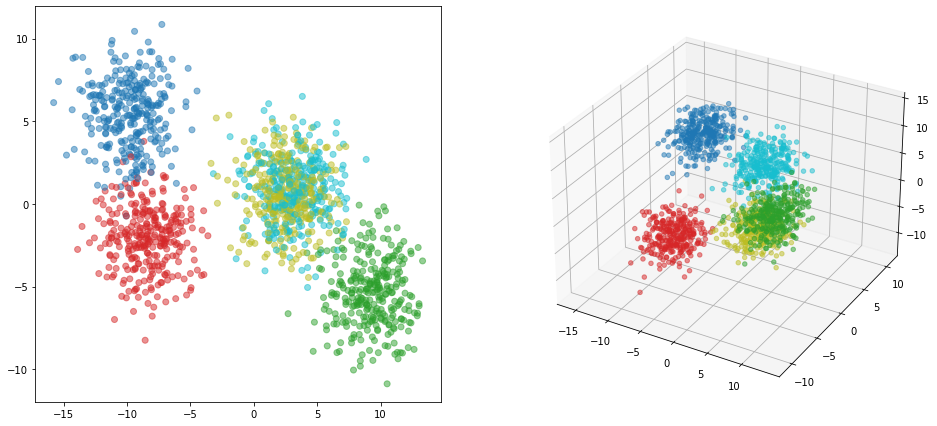

In [11]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2, projection='3d')

ax1.scatter(points[:,0], points[:,1], c=clusters_colors, alpha=0.5)
ax2.scatter(points[:,0], points[:,1], points[:,2], c=clusters_colors, alpha=0.5)
fig.show()

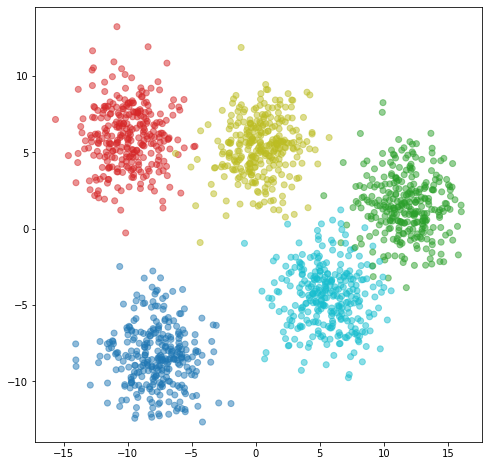

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(points)
points = pca.transform(points)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(points[:,0], points[:,1], c=clusters_colors, alpha=0.5)
fig.show()

In [105]:
kmeans_sklearn = KMeans(n_clusters=N_CLUSTERS)
kmeans_sklearn.fit(points)
centers_sklearn = kmeans_sklearn.cluster_centers_
centers_sklearn

array([[-9.91915563,  6.00640441],
       [11.76605552,  1.5751766 ],
       [-7.75453991, -8.38275416],
       [ 0.39861409,  5.24739029],
       [ 5.65709291, -4.48546933]])

In [7]:
clusters_colors_sklearn = list(map(lambda x: colors[x], kmeans_sklearn.labels_))

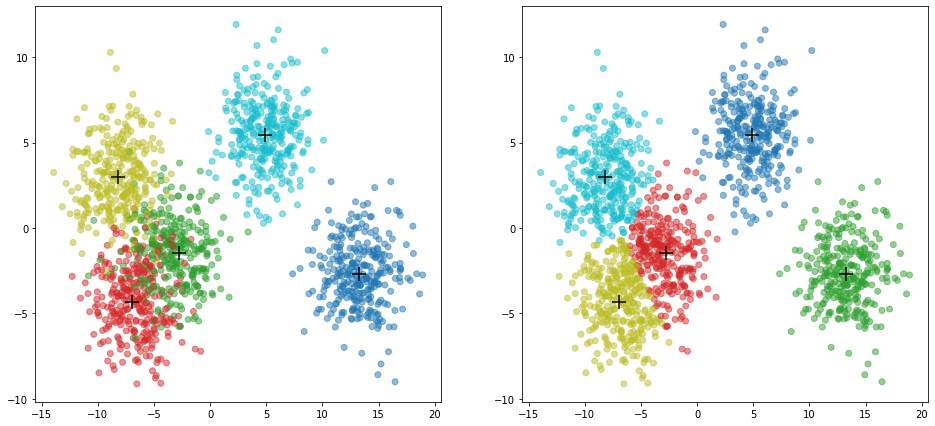

In [9]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.scatter(points[:,0], points[:,1], c=clusters_colors, alpha=0.5)
ax1.scatter(centers_sklearn[:,0], centers_sklearn[:,1], s=200, marker='+', color='black')

ax2.scatter(points[:,0], points[:,1], c=clusters_colors_sklearn, alpha=0.5)
ax2.scatter(centers_sklearn[:,0], centers_sklearn[:,1], s=200, marker='+', color='black')
fig.show()

array([[ 5.65709291, -4.48546933],
       [-9.91915563,  6.00640441],
       [ 0.39861409,  5.24739029],
       [11.76605552,  1.5751766 ],
       [-7.75453991, -8.38275416]])

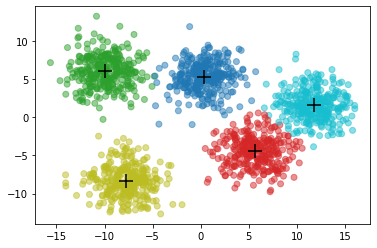

In [230]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from matplotlib import rcParams
from IPython.display import HTML

def get_kmeans_centers(n_clusters: int, points: np.array) -> tuple[tuple, list]:
    points = np.array(points)
    features = points.shape[1]
    maxes = [[min(points[:,feature]),max(points[:,feature])] for feature in range(features)]
    centers = np.array([list(np.random.uniform(*maxes[feature]) for feature in range(features)) for _ in range(n_clusters)])
    labels = [0 for _ in points]

    fig,ax = plt.subplots()
    # clusters_colors_own = list(map(lambda x: colors[x], labels))
    # points_scatter = ax.scatter(points[:,0], points[:,1], c=clusters_colors_own, alpha=0.5)
    # centers_scatter = ax.scatter(centers[:,0], centers[:,1], s=200, marker='+', color='black')

    def amination_frame(i):
        is_changing = True

        clusters_colors_own = list(map(lambda x: colors[x], labels))
        points_scatter.set_color(clusters_colors_own)
        centers_scatter.set_offsets(centers)

        for point_index, point in enumerate(points):
            distances = [np.linalg.norm(point-center) for center in centers]
            label = distances.index(min(distances))
            labels[point_index] = label

        for center_index, center in enumerate(centers):
            center_points = [point for point_index, point  in enumerate(points) if labels[point_index] == center_index]
            new_center = np.mean(center_points, axis=0)
            is_changing = not (new_center == centers[center_index]).all()
            centers[center_index] = new_center

       
        # centers_scatter.set_xdata(centers[:,0])
        # centers_scatter.set_ydata(centers[:,1])
        return points_scatter, centers_scatter

    anim = FuncAnimation(fig, func=amination_frame, frames=20, interval=100)
    anim.save('anim3.gif')
    # HTML(anim.to_jshtml())
    # HTML(anim.to_html5_video())
    return np.array(centers), labels

plt.rcParams['animation.html'] = 'html5'
plt.rcParams['animation.writer'] = 'pillow'
centers_own, labels_own = get_kmeans_centers(N_CLUSTERS, points)
centers_own


In [109]:
clusters_colors_own = list(map(lambda x: colors[x], labels_own))

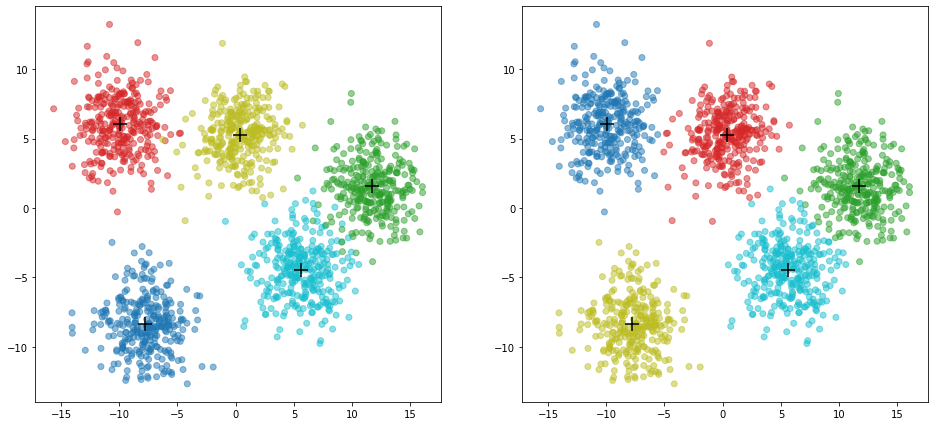

In [112]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.scatter(points[:,0], points[:,1], c=clusters_colors, alpha=0.5)
ax1.scatter(centers_own[:,0], centers_own[:,1], s=200, marker='+', color='black')

ax2.scatter(points[:,0], points[:,1], c=clusters_colors_own, alpha=0.5)
ax2.scatter(centers_own[:,0], centers_own[:,1], s=200, marker='+', color='black')
fig.show()